I know two strategies to make PCA more robust. The following is the implementation of each of them
técnicas de preprocesamient: normalización y estandarización
Transforming the data vectors more robust: RobustScaler
Robust generalization of variance maximization: minimum covariance determinant (MCD)

### Robust PCA

In [21]:
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Load MNIST dataset
X, y  = fetch_openml(data_id=554, parser='auto', return_X_y=True) # https://www.openml.org/d/554

# Select only 0s and 8s
num=['0','8']
y1 = y.isin(num)
indices = y1[y1].index
X = X.loc[indices]
y = y.loc[indices]

# Reset index after class selection
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

# Split into training and test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Apply PCA with 2 components
#pca = PCA(n_components=2)
#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)
############################################################################################################
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.covariance import MinCovDet
from sklearn.preprocessing import  MinMaxScaler


# Normalize the data using StandardScaler
scaler = MinMaxScaler().fit(X)
X1 = scaler.transform(X)

### center = RobustScaler(with_centering=True).fit(X)
### X1 = center.transform(X)

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)

### robust_cov = MinCovDet().fit(X_train)

# Apply PCA to the normalized data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

############################################################################################################

print(X_train_pca.shape)
print(y_train.shape)

(10982, 784)
(10982,)
(10982, 2)
(10982,)


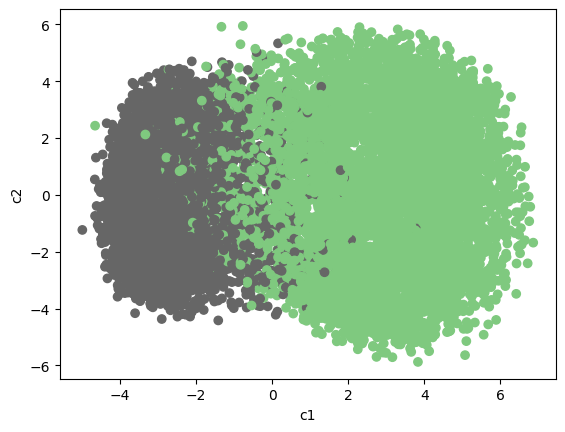

Confusion Matrix: 
 [[1294   79]
 [  54 1319]] 


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      1373
           8       0.94      0.96      0.95      1373

    accuracy                           0.95      2746
   macro avg       0.95      0.95      0.95      2746
weighted avg       0.95      0.95      0.95      2746



In [22]:


# Plot the 2 new features generated by PCA
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train.astype('int32'), cmap='Accent')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()




# Train logistic regression on reduced dataset
clf1 = LogisticRegression(random_state=0).fit(X_train_pca, y_train)

# Test score
score1 = clf1.score(X_test_pca, y_test)

# Confusion matrix
predictions1 = clf1.predict(X_test_pca)
cm1 = metrics.confusion_matrix(y_true=y_test, y_pred=predictions1, labels=clf1.classes_)
print('Confusion Matrix:', "\n", cm1, "\n"*2)

# Evaluate the model using classification_report for accuracy, precision, and recall
cr1 = metrics.classification_report(y_test, predictions1, target_names=clf1.classes_)
print('Classification Report:', "\n", cr1)